<a href="https://colab.research.google.com/github/ljm524/esaa24-2/blob/main/esaa_hw0906.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [개념정리]

## 4장 모델 훈련


### 4.1 선형 회귀
4.1.1 정규방정식
*   beta_hat = (X_transpose*x)^(-1)*X_transpose*y
*   X+ : 유사역행렬
*   특잇값 분해(SVD) : 표준 행렬 분해 기법

4.1.2 계산 복잡도 : O(n^2.4)~O(n^3)



### 4.2 경사 하강법 : 일반적 최적화 알고리즘
4.2.1 배치 경사 하강법
*   편도함수 : theta j에 대한 비용 함수의 그래디언트
*   epsilon(허용오차) : 벡터의 노름에 대한 임곗값 -> 벡터의 노름이 엡실론보다 작아지면 경사 하강법이 최솟값에 도달한 것이므로 알고리즘 중지

4.2.2 확률적 경사 하강법 : 매 스텝에서 한 개의 샘플을 무작위 선택하고 그 하나의 샘플에 대한 그래디언트 계산

4.2.3 미니배치 경사 하강법 : 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그래디언트 계산

## 4.3 다항 회귀

## 4.4 학습 곡선

## 4.5 규제가 있는 선형 모델
4.5.1 릿지 회귀

4.5.2 라쏘 회귀

4.5.3 엘라스틱넷

4.5.4 조기 종료

## 4.6 로지스틱 회귀
4.6.1 확률 추정

4.6.2 훈련과 비용 함수

4.6.3 결정 경계

4.6.4 소프트맥스 회귀


# [필사]

# 선형 회귀

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[3.9426163 ],
       [3.04885882]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.9426163 ],
       [10.04033394]])

In [ ]:
import matplotlib.pyplot as plt

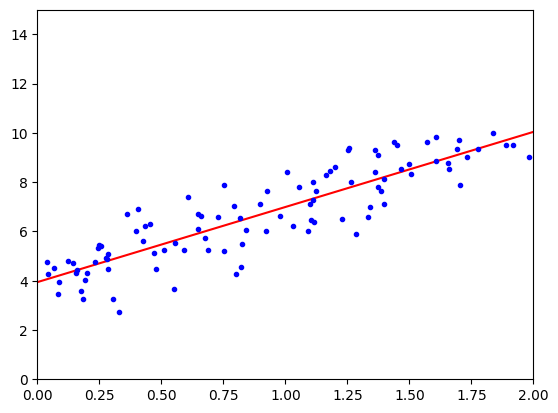

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.9426163]), array([[3.04885882]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 3.9426163 ],
       [10.04033394]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.9426163 ],
       [3.04885882]])

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[3.9426163 ],
       [3.04885882]])

# 경사 하강법
## 배치 경사 하강법

In [ ]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
theta

array([[3.9426163 ],
       [3.04885882]])

## 확률적 경사 하강법

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [ ]:
theta

array([[3.93868032],
       [3.02394952]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.98019531]), array([3.07526223]))

# 다항 회귀

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.42053368])

In [ ]:
X_poly[0]

array([-0.42053368,  0.17684858])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.04967706]), array([[1.02574932, 0.49860688]]))

# 학습 곡선

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

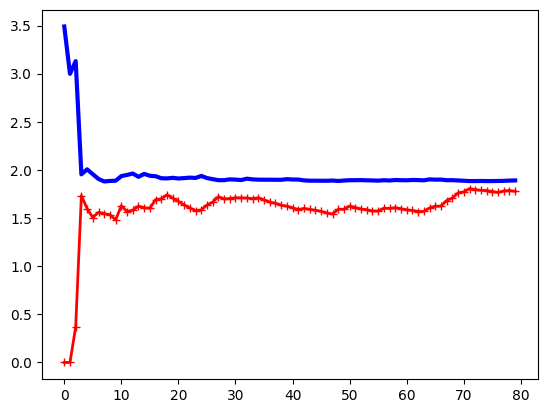

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

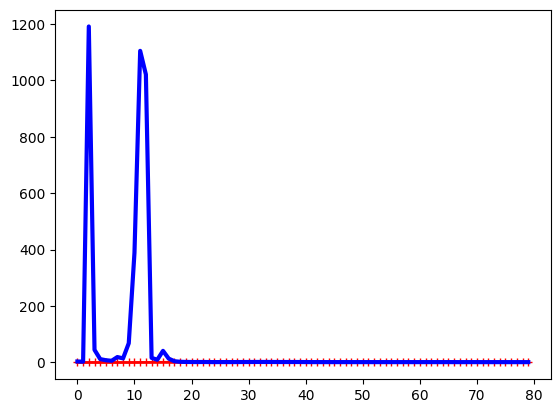

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

# 규제가 있는 선형 모델

## 릿지 회귀

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.15266976]])

In [ ]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.13551439])

## 라쏘 회귀

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.11325887])

## 엘라스틱넷

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.11229446])

## 조기 종료

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

In [ ]:
from sklearn.base import clone

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train.ravel()) # 훈련을 이어서 진행합니다.
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

# 로지스틱 회귀

## 결정 경계

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(int)  # Iris virginica이면 1 아니면 0

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

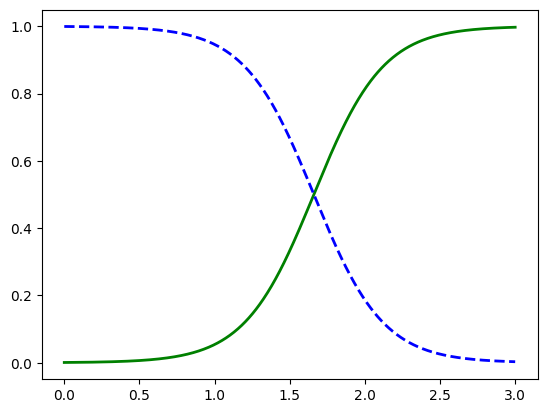

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
# 다음은 이미지를 미려하게 출력하기 위한 맷플롯립 코드가 이어집니다.

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## 소프트맥스 회귀

In [ ]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])